In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/bank-loan-data/loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [10]:
df['person_age'].describe()

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

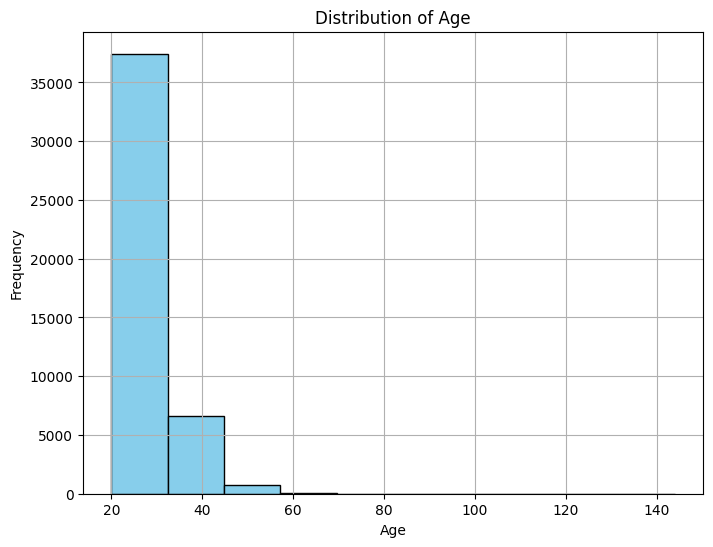

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


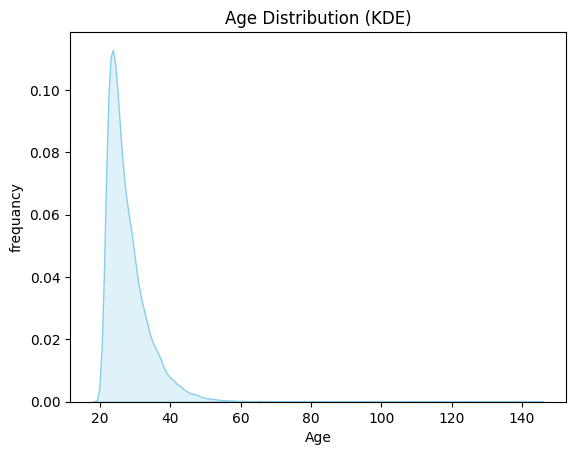

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['person_age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.kdeplot(df['person_age'], fill=True, color='skyblue')
plt.title("Age Distribution (KDE)")
plt.xlabel("Age")
plt.ylabel("frequancy")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

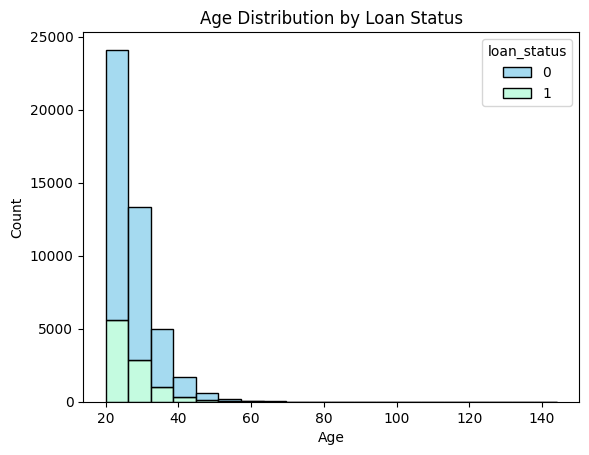

In [12]:
sns.histplot(data=df, x='person_age', hue='loan_status', multiple='stack', bins=20 , palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Age Distribution by Loan Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [13]:
df['person_gender'].value_counts()


person_gender
male      24841
female    20159
Name: count, dtype: int64

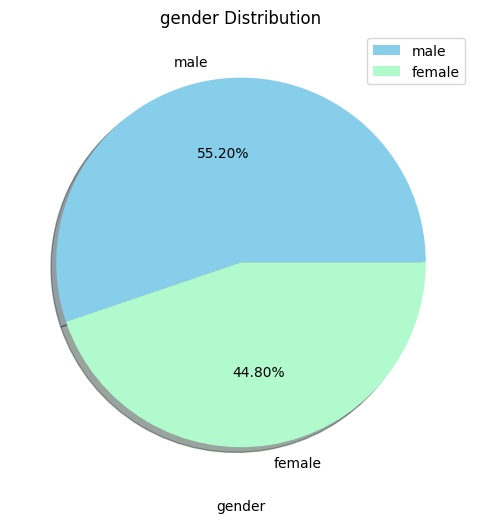

In [14]:
plt.figure(figsize=(6, 6))
plt.pie(df['person_gender'].value_counts(), explode=[0,0], labels=df['person_gender'].value_counts().index, colors=[ 'skyblue', '#B1FACE'], shadow=True, autopct="%1.2f%%")
plt.title('gender Distribution')
plt.xlabel('gender')
plt.legend()

plt.show()

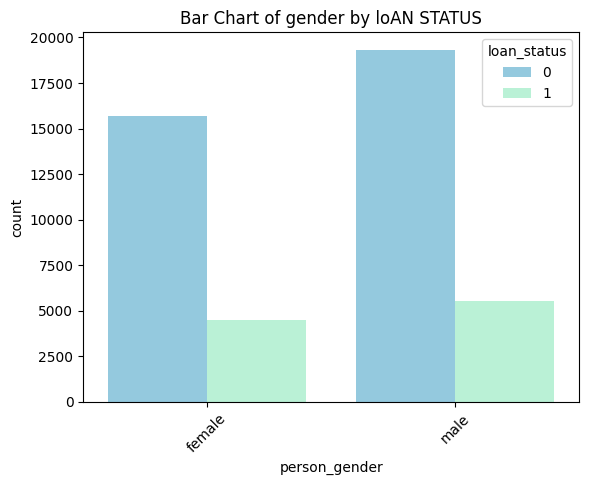

In [15]:
sns.countplot(data=df, x='person_gender', hue='loan_status', palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.xticks(rotation=45)
plt.title('Bar Chart of gender by loAN STATUS' )
plt.show()

In [16]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

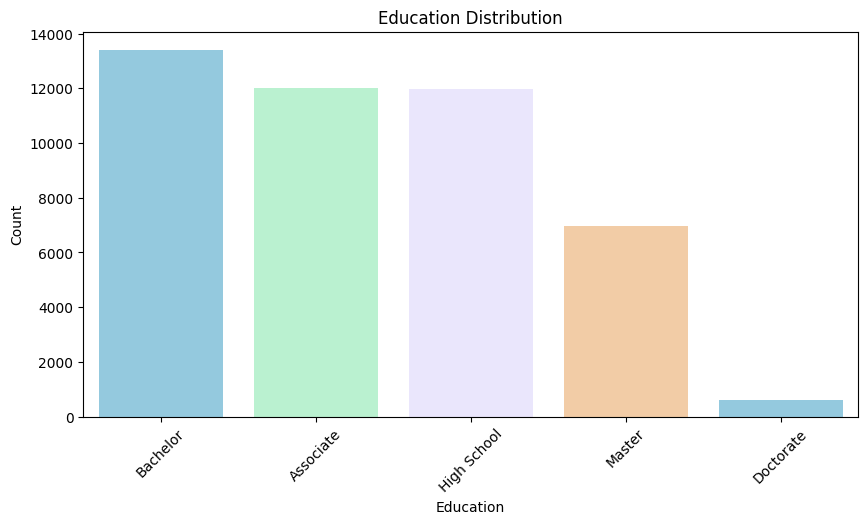

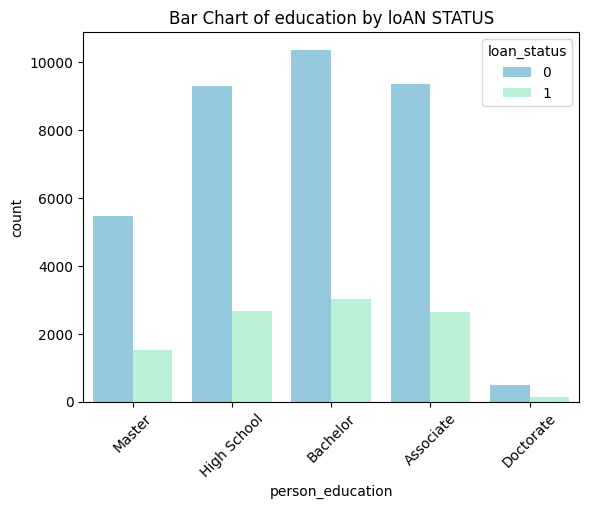

In [17]:
my_colors=['skyblue', '#B1FACE','#E8E3FF','#FFCC99']
plt.figure(figsize=(10, 5))
sns.barplot(x=df['person_education'].value_counts().index, 
            y=df['person_education'].value_counts().values, 
            palette=my_colors )
plt.xticks(rotation=45)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='person_education', hue='loan_status', palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.xticks(rotation=45)
plt.title('Bar Chart of education by loAN STATUS' )
plt.show()

In [18]:
df['person_income'].describe()

count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64

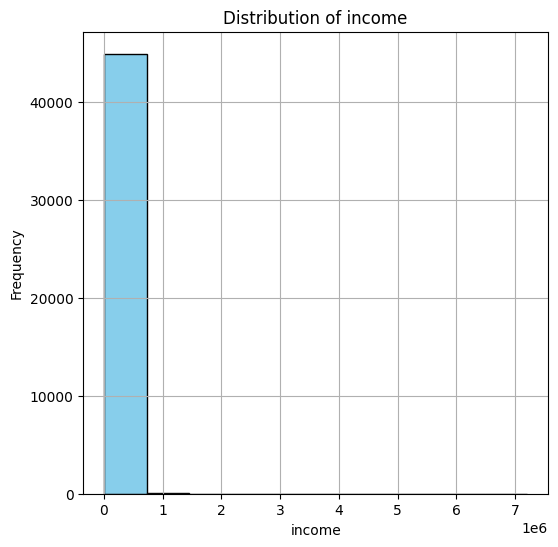

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


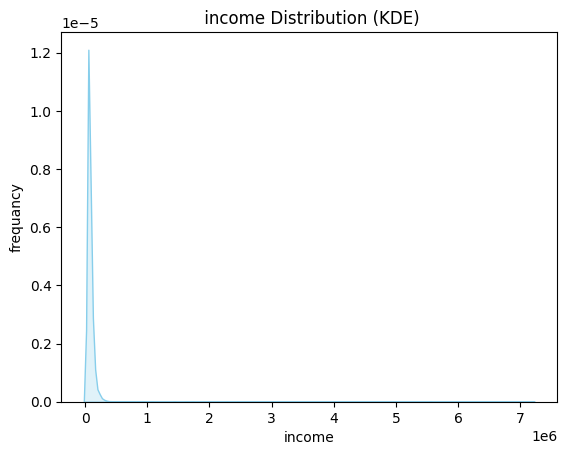

In [19]:
plt.figure(figsize=(6, 6))
plt.hist(df['person_income'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of income')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sns.kdeplot(df['person_income'], fill=True, color='skyblue')
plt.title(" income Distribution (KDE)")
plt.xlabel("income")
plt.ylabel("frequancy")
plt.show()



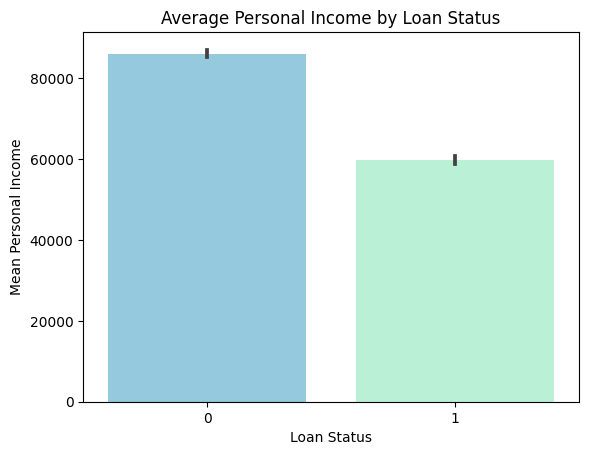

In [20]:

sns.barplot(x='loan_status', y='person_income', data=df, estimator='mean' , palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Average Personal Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Mean Personal Income')
plt.show()

In [21]:

df['person_emp_exp'].describe()	

count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64

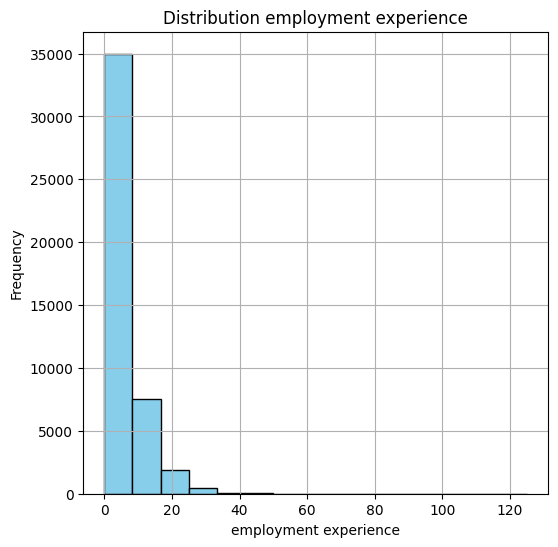

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


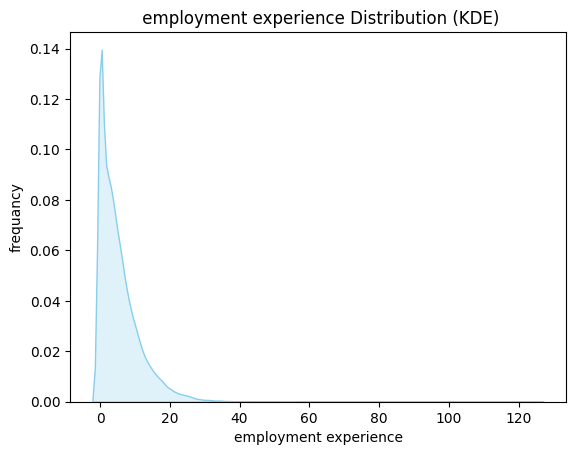

In [22]:
plt.figure(figsize=(6, 6))
plt.hist(df['person_emp_exp'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution employment experience')
plt.xlabel('employment experience')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sns.kdeplot(df['person_emp_exp'], fill=True, color='skyblue')
plt.title(" employment experience Distribution (KDE)")
plt.xlabel("employment experience")
plt.ylabel("frequancy")
plt.show()



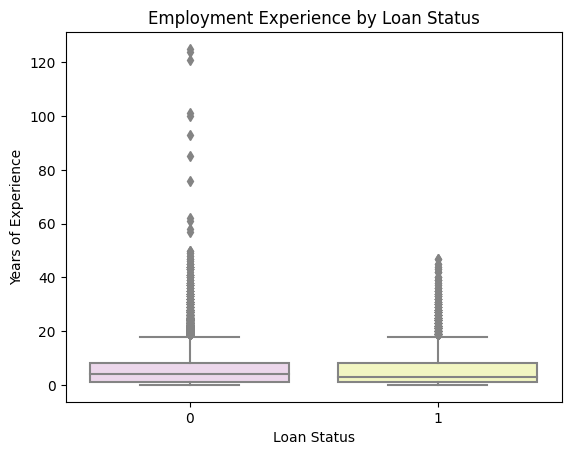

In [23]:

sns.boxplot(x='loan_status', y='person_emp_exp', data=df , palette=['#EFD4EE', '#F9FFB9','#E8E3FF' '#ffcc99'])
plt.title('Employment Experience by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Years of Experience')
plt.show()

In [24]:

df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

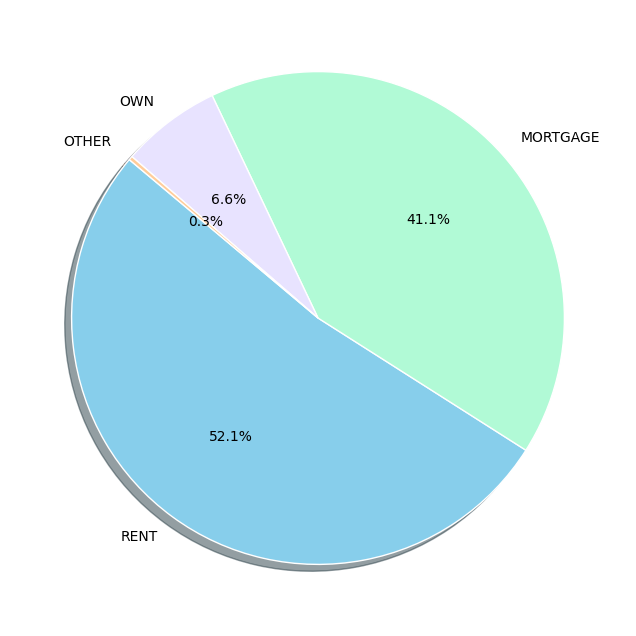

In [25]:
top_values = df['person_home_ownership'].value_counts()

colors = ['skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99']  

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_values,
    labels=top_values.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)


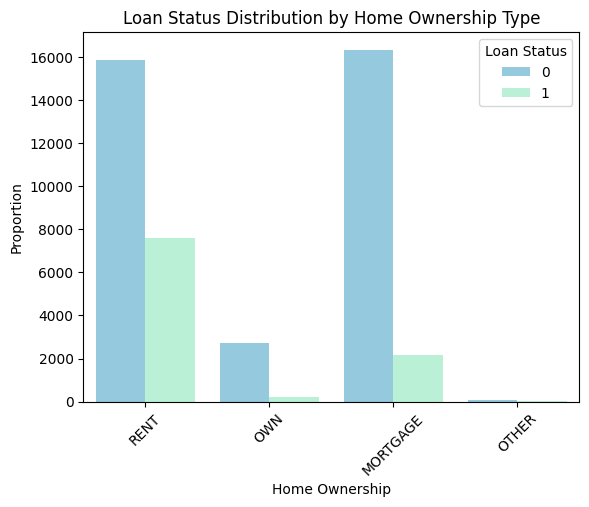

In [26]:
sns.countplot(x='person_home_ownership', hue='loan_status', data=df , palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Loan Status Distribution by Home Ownership Type')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

In [27]:
df['loan_amnt'].describe()	

count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64

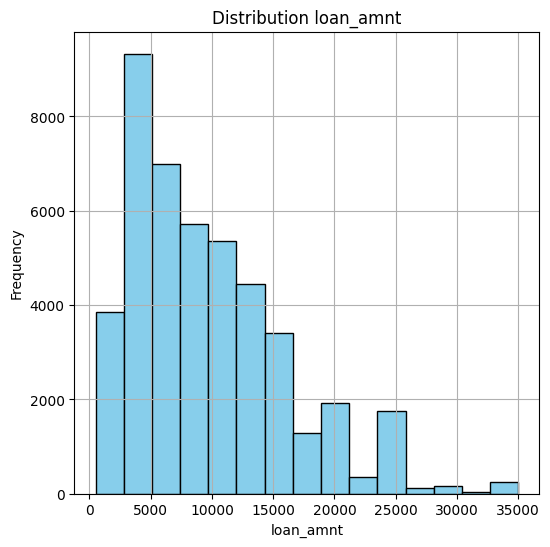

Text(0, 0.5, 'Loan Amount')

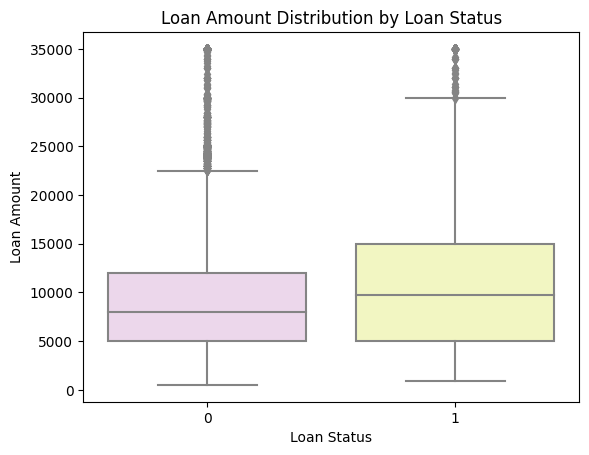

In [28]:
plt.figure(figsize=(6, 6))
plt.hist(df['loan_amnt'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.boxplot(x='loan_status', y='loan_amnt', data=df , palette=['#EFD4EE', '#F9FFB9','#E8E3FF' '#ffcc99'])
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')



In [29]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

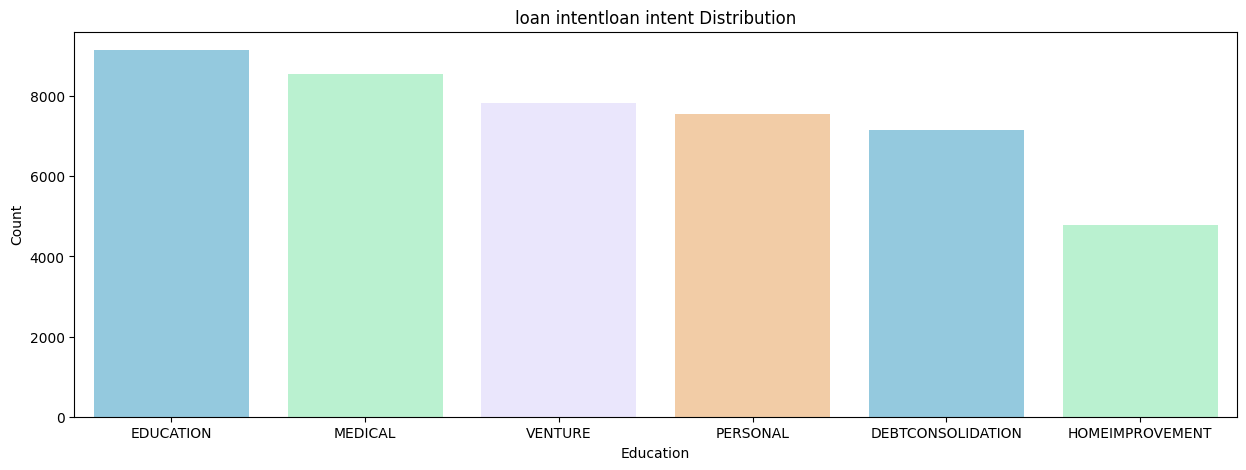

In [30]:
my_colors=['skyblue', '#B1FACE','#E8E3FF','#FFCC99']
plt.figure(figsize=(15, 5))
sns.barplot(x=df['loan_intent'].value_counts().index, 
            y=df['loan_intent'].value_counts().values, 
            palette=my_colors )
plt.title('loan intentloan intent Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

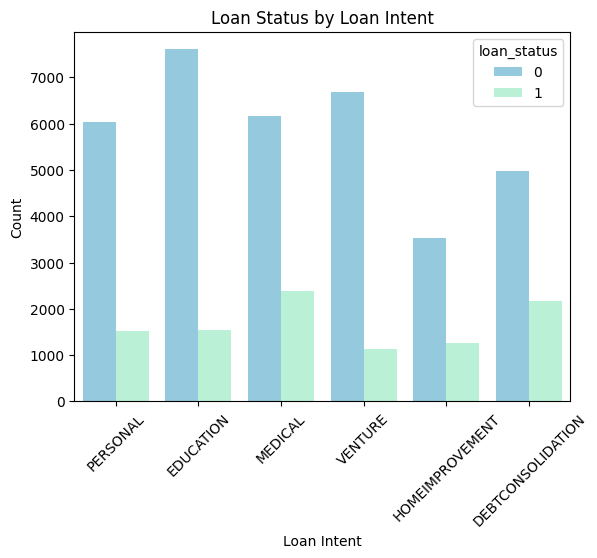

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_intent', hue='loan_status', data=df  , palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.title('Loan Status by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [32]:
df['loan_int_rate'].describe()	

count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64

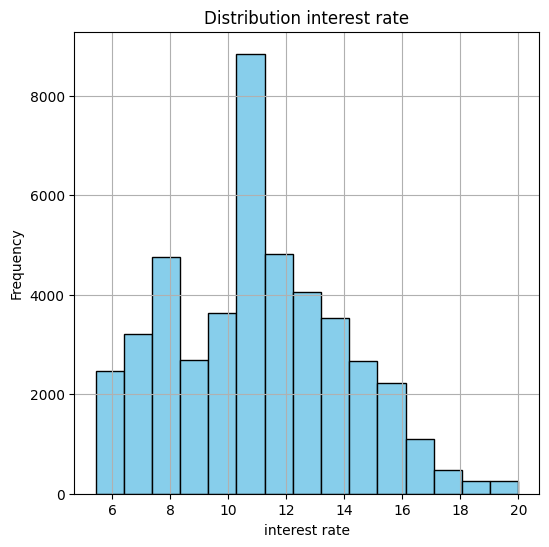

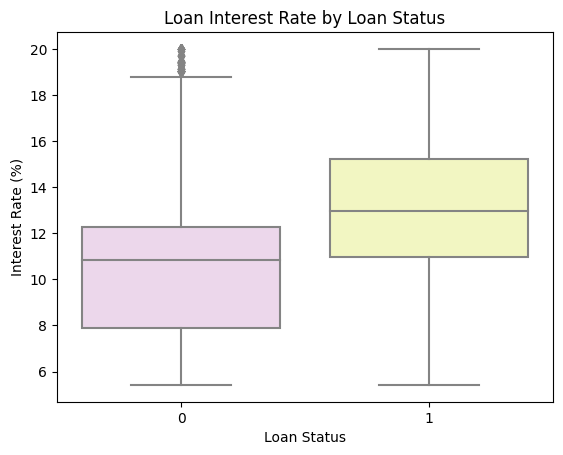

In [33]:
plt.figure(figsize=(6, 6))
plt.hist(df['loan_int_rate'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution interest rate')
plt.xlabel('interest rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.boxplot(x='loan_status', y='loan_int_rate', data=df , palette=['#EFD4EE', '#F9FFB9','#E8E3FF' '#ffcc99']) 
plt.title('Loan Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

In [34]:

df['loan_percent_income'].describe()	

count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64

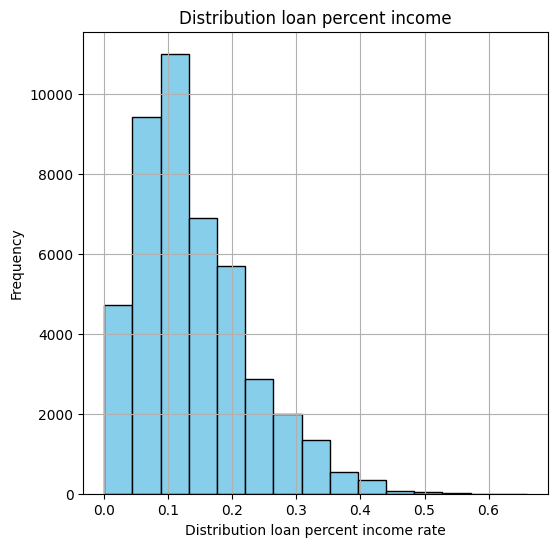

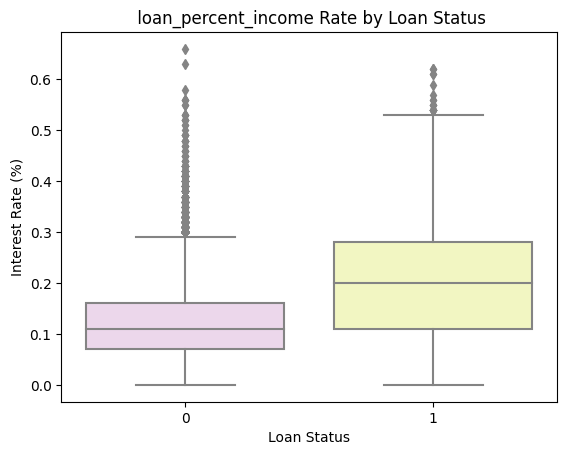

In [35]:
plt.figure(figsize=(6, 6))
plt.hist(df['loan_percent_income'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution loan percent income')
plt.xlabel('Distribution loan percent income rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.boxplot(x='loan_status', y='loan_percent_income', data=df , palette=['#EFD4EE', '#F9FFB9','#E8E3FF' '#ffcc99'])
plt.title(' loan_percent_income Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

In [36]:
df['cb_person_cred_hist_length'].describe()

count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

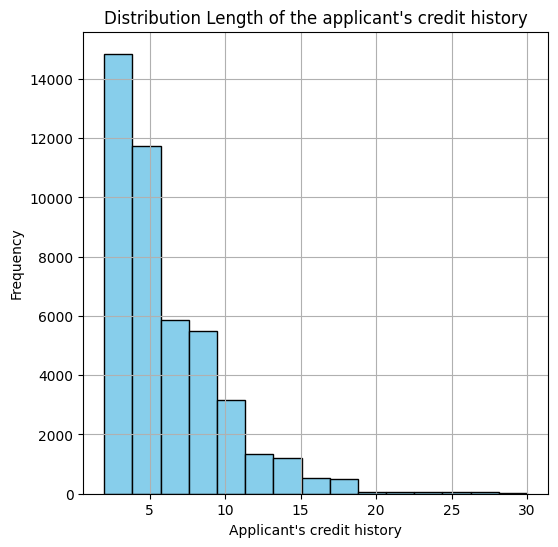

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


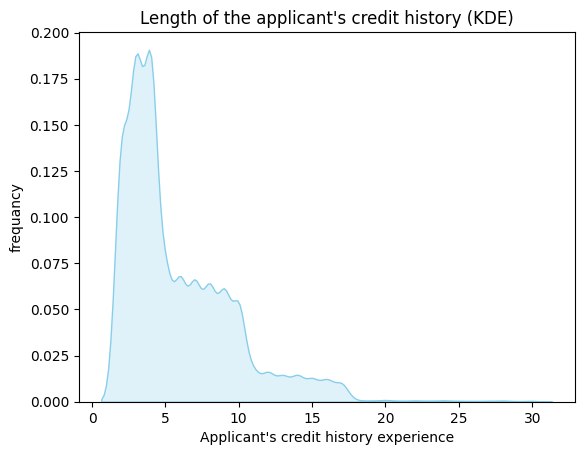

In [37]:
plt.figure(figsize=(6, 6))
plt.hist(df['cb_person_cred_hist_length'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution Length of the applicant's credit history")
plt.xlabel("Applicant's credit history")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sns.kdeplot(df['cb_person_cred_hist_length'], fill=True, color='skyblue')
plt.title("Length of the applicant's credit history (KDE)")
plt.xlabel("Applicant's credit history experience")
plt.ylabel("frequancy")
plt.show()

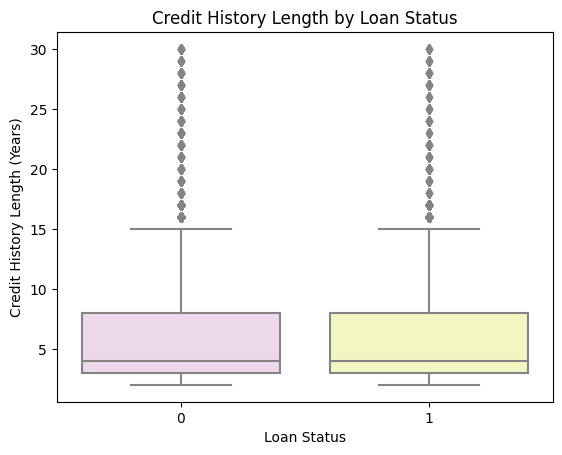

In [38]:
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df , palette=['#EFD4EE', '#F9FFB9','#E8E3FF' '#ffcc99'])
plt.title('Credit History Length by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit History Length (Years)')
plt.show()



In [39]:
df['credit_score'].describe()

count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64

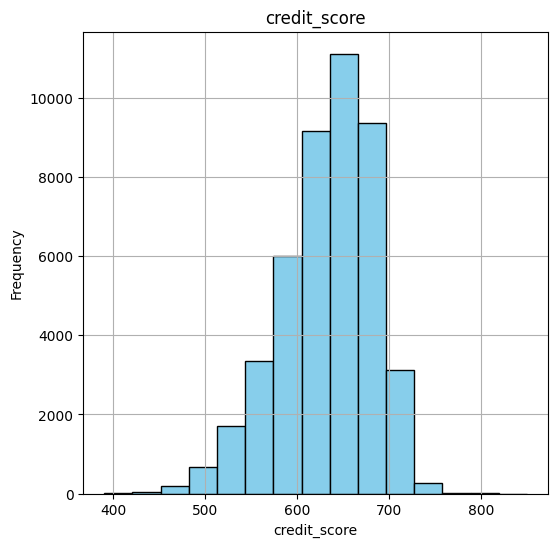

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


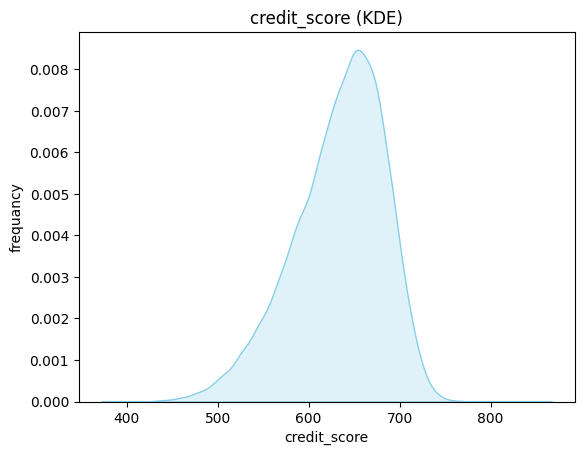

In [40]:
plt.figure(figsize=(6, 6))
plt.hist(df['credit_score'], bins=15, color='skyblue', edgecolor='black')
plt.title("credit_score")
plt.xlabel("credit_score")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sns.kdeplot(df['credit_score'], fill=True, color='skyblue')
plt.title("credit_score (KDE)")
plt.xlabel("credit_score")
plt.ylabel("frequancy")
plt.show()

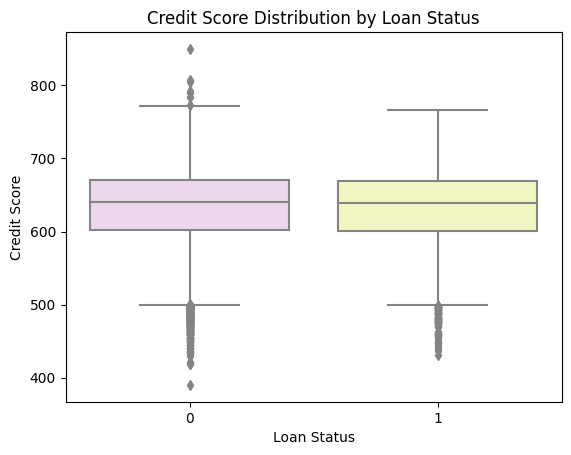

In [41]:
sns.boxplot(x='loan_status', y='credit_score', data=df , palette=['#EFD4EE', '#F9FFB9','#E8E3FF' '#ffcc99'])
plt.title('Credit Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


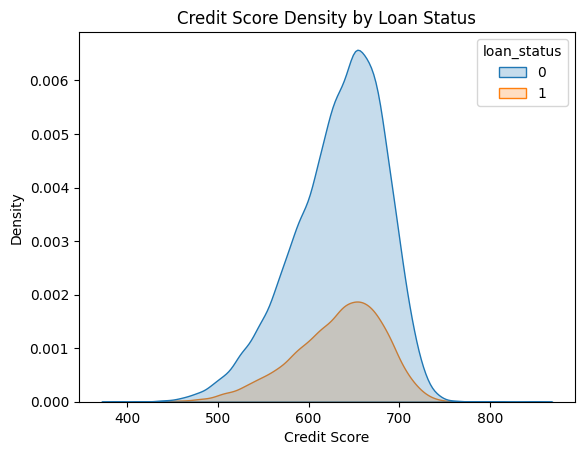

In [42]:
sns.kdeplot(data=df, x='credit_score', hue='loan_status', fill=True)
plt.title('Credit Score Density by Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.show()

In [43]:
df['previous_loan_defaults_on_file'].value_counts()


previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

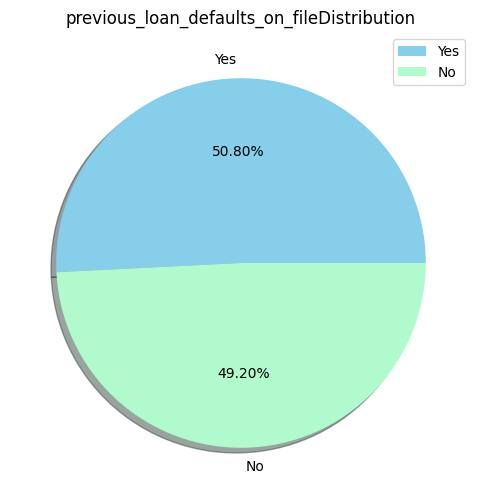

In [44]:
plt.figure(figsize=(6, 6))
plt.pie(df['previous_loan_defaults_on_file'].value_counts(), explode=[0,0], labels=df['previous_loan_defaults_on_file'].value_counts().index, colors=[ 'skyblue', '#B1FACE'], shadow=True, autopct="%1.2f%%")
plt.title('previous_loan_defaults_on_fileDistribution')

plt.legend()

plt.show()

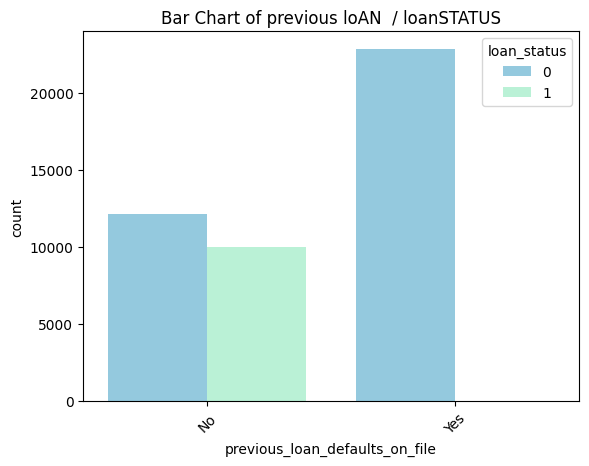

In [45]:


sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', palette= ('skyblue', '#B1FAD6', '#E8E3FF', '#FFCC99'))
plt.xticks(rotation=45)
plt.title('Bar Chart of previous loAN  / loanSTATUS' )
plt.show()

In [46]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

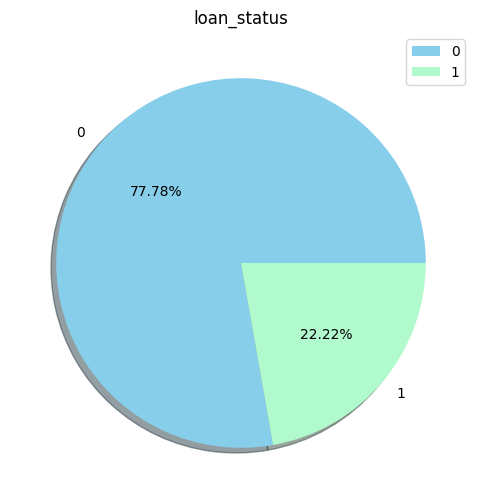

In [47]:
plt.figure(figsize=(6, 6))
plt.pie(df['loan_status'].value_counts(), explode=[0,0], labels=df['loan_status'].value_counts().index, colors=[ 'skyblue', '#B1FACE'], shadow=True, autopct="%1.2f%%")
plt.title('loan_status')

plt.legend()

plt.show()

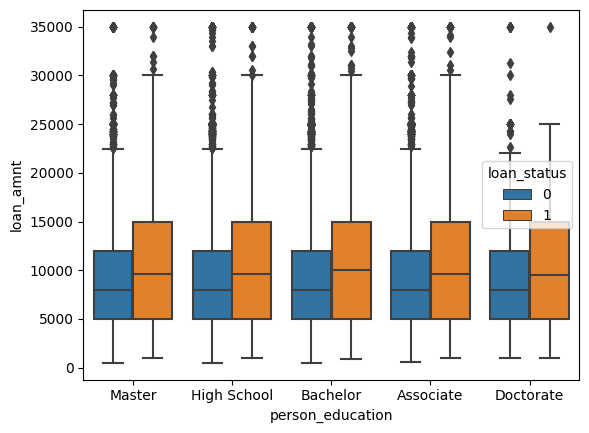

In [48]:
sns.boxplot(x='person_education', y='loan_amnt', hue='loan_status', data=df)
plt.show()

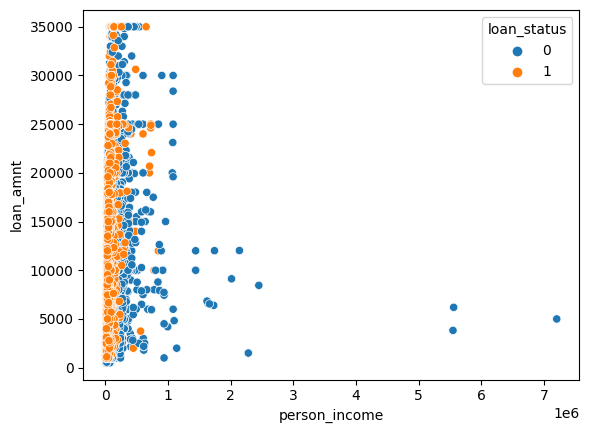

In [49]:
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df)
plt.show()

In [50]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [51]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [52]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

#### Data Encoding

In [53]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [54]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No


In [55]:
X['person_gender'].value_counts().sort_index(ascending=True)

person_gender
female    20159
male      24841
Name: count, dtype: int64

In [56]:
Square_Feet_counts = X['person_gender'].value_counts().sort_index()
for i, (Square_Feet, count) in enumerate(Square_Feet_counts.items(), start=0):
    print(f"{i}. {Square_Feet} : {count}")

0. female : 20159
1. male : 24841


In [57]:
encoder = LabelEncoder()
X['person_gender'] = encoder.fit_transform(X['person_gender'])

In [58]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No


In [59]:
X['person_education'].value_counts().sort_index(ascending=True)

person_education
Associate      12028
Bachelor       13399
Doctorate        621
High School    11972
Master          6980
Name: count, dtype: int64

In [60]:
Square_Feet_counts = X['person_education'].value_counts().sort_index()
for i, (Square_Feet, count) in enumerate(Square_Feet_counts.items(), start=0):
    print(f"{i}. {Square_Feet} : {count}")

0. Associate : 12028
1. Bachelor : 13399
2. Doctorate : 621
3. High School : 11972
4. Master : 6980


In [61]:
encoder = LabelEncoder()
X['person_education'] = encoder.fit_transform(X['person_education'])

In [62]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,0,3,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,0,3,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,0,1,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,1,4,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No


In [63]:
X['person_home_ownership'].value_counts().sort_index(ascending=True)

person_home_ownership
MORTGAGE    18489
OTHER         117
OWN          2951
RENT        23443
Name: count, dtype: int64

In [64]:
Square_Feet_counts = X['person_home_ownership'].value_counts().sort_index()
for i, (Square_Feet, count) in enumerate(Square_Feet_counts.items(), start=0):
    print(f"{i}. {Square_Feet} : {count}")

0. MORTGAGE : 18489
1. OTHER : 117
2. OWN : 2951
3. RENT : 23443


In [65]:
encoder = LabelEncoder()
X['person_home_ownership'] = encoder.fit_transform(X['person_home_ownership'])

In [66]:
X['loan_intent'].value_counts().sort_index(ascending=True)

loan_intent
DEBTCONSOLIDATION    7145
EDUCATION            9153
HOMEIMPROVEMENT      4783
MEDICAL              8548
PERSONAL             7552
VENTURE              7819
Name: count, dtype: int64

In [67]:
Square_Feet_counts = X['loan_intent'].value_counts().sort_index()
for i, (Square_Feet, count) in enumerate(Square_Feet_counts.items(), start=0):
    print(f"{i}. {Square_Feet} : {count}")

0. DEBTCONSOLIDATION : 7145
1. EDUCATION : 9153
2. HOMEIMPROVEMENT : 4783
3. MEDICAL : 8548
4. PERSONAL : 7552
5. VENTURE : 7819


In [68]:
encoder = LabelEncoder()
X['loan_intent'] = encoder.fit_transform(X['loan_intent'])

In [69]:
X['previous_loan_defaults_on_file'].value_counts().sort_index(ascending=True)

previous_loan_defaults_on_file
No     22142
Yes    22858
Name: count, dtype: int64

In [70]:
Square_Feet_counts = X['previous_loan_defaults_on_file'].value_counts().sort_index()
for i, (Square_Feet, count) in enumerate(Square_Feet_counts.items(), start=0):
    print(f"{i}. {Square_Feet} : {count}")

0. No : 22142
1. Yes : 22858


In [71]:
encoder = LabelEncoder()
X['previous_loan_defaults_on_file'] = encoder.fit_transform(X['previous_loan_defaults_on_file'])

In [72]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


### Data Splitting

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [74]:
X_train.shape

(36000, 13)

In [75]:
X_train

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,0,1,97265.0,11,0,15000.0,4,12.73,0.15,9.0,631,0
12555,25.0,1,3,72953.0,3,3,12000.0,5,11.86,0.16,4.0,659,1
29153,41.0,0,4,322597.0,18,0,24000.0,4,10.37,0.07,11.0,683,1
23838,27.0,1,0,94232.0,4,3,9600.0,1,17.14,0.10,7.0,641,0
35686,27.0,1,4,84873.0,7,3,7059.0,2,12.97,0.08,3.0,706,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,26.0,1,3,88451.0,6,0,10625.0,1,6.03,0.12,4.0,559,1
44732,25.0,0,3,34772.0,3,0,5876.0,2,11.69,0.17,4.0,647,0
38158,33.0,0,0,58317.0,9,0,10707.0,5,10.74,0.18,9.0,652,1
860,26.0,1,4,178602.0,6,3,20000.0,0,17.99,0.11,3.0,604,0


In [76]:
y_train.shape

(36000,)

In [77]:
y_train

25180    0
12555    0
29153    0
23838    0
35686    0
        ..
11284    0
44732    1
38158    0
860      1
15795    0
Name: loan_status, Length: 36000, dtype: int64

In [78]:
X_test.shape

(9000, 13)

In [79]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
37979,32.0,1,0,96865.0,10,0,7500.0,1,6.04,0.08,10.0,601,0
9911,24.0,1,0,56838.0,6,3,9000.0,1,11.49,0.16,4.0,647,1
43386,22.0,0,4,37298.0,0,3,5000.0,3,14.88,0.13,4.0,711,0
13822,23.0,0,1,39944.0,1,2,5000.0,5,13.99,0.13,3.0,597,1
44810,42.0,1,3,67974.0,20,0,10000.0,2,15.41,0.15,11.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14572,21.0,1,1,133205.0,0,0,14000.0,5,9.99,0.11,2.0,654,0
30384,39.0,1,3,61889.0,17,3,6725.0,1,16.45,0.11,11.0,606,1
36665,24.0,0,4,78950.0,1,3,14000.0,1,11.65,0.18,3.0,614,0
30569,38.0,1,0,37142.0,16,3,8000.0,3,11.01,0.22,14.0,695,0


In [80]:
y_test.shape

(9000,)

In [81]:
y_test

37979    0
9911     0
43386    1
13822    0
44810    1
        ..
14572    0
30384    0
36665    0
30569    0
5321     0
Name: loan_status, Length: 9000, dtype: int64

## LogisticRegression

In [82]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
y_pred = model.predict(X_test)

In [84]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.791
Confusion Matrix:
 [[6875  115]
 [1766  244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      6990
           1       0.68      0.12      0.21      2010

    accuracy                           0.79      9000
   macro avg       0.74      0.55      0.54      9000
weighted avg       0.77      0.79      0.73      9000



### Support Vector Machine (SVM)

In [85]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf')  
svc_model.fit(X_train, y_train)

SVC()

In [86]:
y_pred = svc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8014444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      6990
           1       0.80      0.15      0.25      2010

    accuracy                           0.80      9000
   macro avg       0.80      0.57      0.57      9000
weighted avg       0.80      0.80      0.74      9000



### KNeighborsClassifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8304444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6990
           1       0.65      0.51      0.58      2010

    accuracy                           0.83      9000
   macro avg       0.76      0.72      0.73      9000
weighted avg       0.82      0.83      0.82      9000



### DecisionTreeClassifier

In [89]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [91]:
y_pred_tree = tree_model.predict(X_test)

In [92]:
print(" DecisionTreeClassifier Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

 DecisionTreeClassifier Accuracy: 0.8981111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.77      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



### Bagging Models(BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier)

In [93]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier


bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("BaggingClassifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report (Bagging):\n", classification_report(y_test, y_pred_bagging))



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

print("ExtraTreesClassifier Accuracy:", accuracy_score(y_test, y_pred_et))
print("\nClassification Report (Extra Trees):\n", classification_report(y_test, y_pred_et))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier Accuracy: 0.9253333333333333

Classification Report (Bagging):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.87      0.78      0.82      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.92      0.93      0.92      9000

RandomForestClassifier Accuracy: 0.9286666666666666

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

ExtraTreesClassifier Accuracy: 0.9215555555555556

Classification Report (Extra Trees):
               precision    recall  f1-score   support

           0       0.93    

### Boosting Models(XGBoost, CatBoost, LGBM)

In [94]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoostClassifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print("CatBoostClassifier Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report (CatBoost):\n", classification_report(y_test, y_pred_cat))


lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("LGBMClassifier Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report (LGBM):\n", classification_report(y_test, y_pred_lgbm))


XGBoostClassifier Accuracy: 0.9321111111111111

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

CatBoostClassifier Accuracy: 0.9328888888888889

Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.79      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000

[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003805 seconds.
You ca

### VotingClassifier and StackingClassifier

In [95]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

print("VotingClassifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report (Voting):\n", classification_report(y_test, y_pred_voting))



stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    passthrough=True
)

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

print("StackingClassifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report (Stacking):\n", classification_report(y_test, y_pred_stack))


VotingClassifier Accuracy: 0.8842222222222222

Classification Report (Voting):
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      6990
           1       0.89      0.55      0.68      2010

    accuracy                           0.88      9000
   macro avg       0.89      0.76      0.80      9000
weighted avg       0.89      0.88      0.87      9000

StackingClassifier Accuracy: 0.9206666666666666

Classification Report (Stacking):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6990
           1       0.90      0.73      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.91      0.85      0.88      9000
weighted avg       0.92      0.92      0.92      9000

